# Setup

In [2]:
import sys
PYTHON_PATH = sys.executable

In [88]:
!$PYTHON_PATH -m pip install --upgrade bitsandbytes>=0.39.0 accelerate>=0.20.0
!$PYTHON_PATH -m pip install --upgrade transformers guidance 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached transformers-4.40.1-py3-none-any.whl.metadata (137 kB)
  Using cached numpy-1.26.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached tokenizers-0.19.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 38.8 MB/s eta 0:00:0000:0100:01
Using cached numpy-1.26.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
Using cached tokenizers-0.19.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.40.0.dev0
    Uninstalling transform

In [2]:
!$PYTHON_PATH -m pip install --upgrade pandas==1.3.0 numpy

^C
ERROR: Operation cancelled by user

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [1]:
import os
os.environ['OMP_NUM_THREADS'] = "32"

## Load model

In [2]:
from guidance import models, select, gen
model_name_or_path = "NousResearch/Meta-Llama-3-8B-Instruct"
# model_name_or_path = "NousResearch/Meta-Llama-3-70B-Instruct"
lm = models.Transformers(
    model_name_or_path, 
    device_map="auto", 
    load_in_8bit=True, 
    _attn_implementation='sdpa',
    echo=False
)

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
import transformers
import torch 

tokenizer = transformers.AutoTokenizer.from_pretrained(
    model_name_or_path,
)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


## Get features from course

In [4]:
edu_programs = {'5455': {'name': 'Компьютерная грамотность',
  'url': 'https://gb.ru/courses/geek-school/literacy',
  'Направление (тег)': 'Профессии для школьников',
  'Специализация': ', Выберу в процессе обучения',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': '',
  'Уровень сложности': 'Junior',
  'Класс': '2-3 классы'},
 '5578': {'name': 'Графический дизайн',
  'url': 'https://gb.ru/courses/geek-school/graphic-design',
  'Направление (тег)': 'Профессии для школьников',
  'Специализация': ', Цифровое творчество',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': '',
  'Уровень сложности': 'Junior',
  'Класс': '4-6 класс,7-8 классы'},
 '5191': {'name': '3D-моделирование в Blender',
  'url': 'https://gb.ru/courses/geek-school/3d',
  'Направление (тег)': 'Профессии для школьников',
  'Специализация': ', Цифровое творчество',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': '',
  'Уровень сложности': 'Junior',
  'Класс': '4-6 классы,7-8 классы'},
 '4020': {'name': 'Дизайн и программирование в Roblox Studio',
  'url': 'https://gb.ru/courses/geek-school/roblox',
  'Направление (тег)': 'Профессии для школьников',
  'Специализация': ', Разработка игр',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': '',
  'Уровень сложности': 'Junior',
  'Класс': '4-6 классы'},
 '5802': {'name': 'Программирование и разработка игр на Scratch',
  'url': 'https://gb.ru/courses/geek-school/scratch',
  'Направление (тег)': 'Профессии для школьников',
  'Специализация': ', Выберу в процессе обучения',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': '',
  'Уровень сложности': 'Junior',
  'Класс': '2-3 классы'},
 '6144': {'name': 'Разработчик',
  'url': 'https://gb.ru/geek_university/developer',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Разработчик — это максимально общее название специалистов, которые связаны с разработкой нового программного обеспечения, сайтов, платформ, экосистем, баз данных, технологических устройств и архитектуры. Они действуют в рамках своей роли в команде, но в целом способны сделать любой проект от стадии замысла до его реализации техническими средствами, Выберу в процессе обучения',
  'Подвид': 'Frontend,Backend,Fullstack,Ручное,Автоматизированное,Сбор и обработка данных,Визуализация данных,Анализ данных,Машинное обучение,Data Science,Нейронные сети,Искусственный интеллект',
  'Тип устройства': 'Десктоп,Веб,Mobile,Оборудование',
  'Технологии, инструменты': 'Java,Python,JavaScript,C++,C,TCP/IP,SQL,NoSQL,Linux,Git,HTML/CSS,Docker,Allure,Selenium,Unit,Power BI,Tableau,Amplitude,ANNs,GAN,и другие',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6104': {'name': 'Программирование и 3D-моделирование в Minecraft',
  'url': 'https://gb.ru/courses/geek-school/minecraft-for-kids',
  'Направление (тег)': 'Профессии для школьников',
  'Специализация': ', Выберу в процессе обучения',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': '',
  'Уровень сложности': 'Junior',
  'Класс': '2-3 классы'},
 '6156': {'name': 'Инженер-аналитик ',
  'url': 'https://gb.ru/geek_university/developer/analyst',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Инженер-аналитик — это специалист совмещающий в себе несколько ролей: системного аналитика, бизнес-аналитика и инженера. В его задачи входят исследование, проектирование, конструирование и разработка новых технологий на базе анализа данных о пользователях, бизнес-процессах и продуктах компании., Аналитика',
  'Подвид': 'Сбор и обработка данных,Визуализация данных,Анализ данных,Машинное обучение,Data Science,Нейронные сети,Искусственный интеллект',
  'Тип устройства': '',
  'Технологии, инструменты': 'SQL,NoSQL,Python,Pandas,Matplotlib,Seaborn,Power BI,Excel,Amplitude,Appsflyer,Tableau,и другие',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6163': {'name': 'BI (Business Intelligence) аналитик ',
  'url': 'https://gb.ru/geek_university/developer/analyst/bi',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'BI-аналитик — это специалист, который использует данные и другую информацию, чтобы помочь организациям принимать обоснованные бизнес-решения. BI -аналитиков также могут попросить запрограммировать инструменты и модели данных, чтобы помочь сделать инфографику или создать инструменты, способные нормировать и контролировать данные., Аналитика',
  'Подвид': '-',
  'Тип устройства': '',
  'Технологии, инструменты': 'Python,SQL,NoSQL,NumPy,Matplotlib,Scikit-learn,Hadoop,Power BI,и другие',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6203': {'name': 'Продуктовый аналитик ',
  'url': 'https://gb.ru/geek_university/developer/analyst/product',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Продуктовый аналитик ищет возможности для улучшения и развития продукта: исследует поведение клиентов, проверяет гипотезы, оценивает эффективность изменений продукта, Аналитика',
  'Подвид': '-',
  'Тип устройства': '',
  'Технологии, инструменты': 'Google Analytics,Яндекс.Метрика,Firebase,Python,SQL,Power BI,MS Excel,Tableau,Google Optimize,и другие',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6247': {'name': 'Инженер-программист C++ ',
  'url': 'https://gb.ru/geek_university/developer/programmer/cpp',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Разработчик C++ создаёт программы, приложения, игры, операционные системы, драйверы и другое высоконагруженное программное обеспечение. Если вы хотите выжать максимум из любого «железа», программировать роботов, создать свою ОС, язык или другую мощную и жадную до ресурсов штуку — вам понадобится язык программирования С++, Программирование',
  'Подвид': 'Backend',
  'Тип устройства': '',
  'Технологии, инструменты': 'C++,Linux,STL,Cmake,QT,TCP/UDP,HTTP,Git',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6215': {'name': 'Разработчик приложений на Android',
  'url': 'https://gb.ru/geek_university/developer/programmer/android',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Разработчики на Android занимаются созданием и доработкой приложений и программ для данной операционной системы. Они создают интерфейс, программируют логику работы приложения, занимаются оптимизацией ресурсов, которые необходимы для работы программы, Программирование',
  'Подвид': 'Fullstack',
  'Тип устройства': '',
  'Технологии, инструменты': 'Java,Kotlin,Android SDK,JUnit,Swift,Objective-C,iOS SDK,JavaScript,C++,CSQL,Git',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6239': {'name': 'Инженер-программист ',
  'url': 'https://gb.ru/geek_university/developer/programmer',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Инженер-программист - это человек, который применяет принципы программной инженерии для проектирования, разработки, обслуживания, тестирования и оценки компьютерного программного обеспечения. Эта профессия подразумевает сочетание должностных обязанностей двух специальностей: программиста и инженера. Таким образом, инженер-программист является своего рода универсалом, объединяющим умения и навыки этих двух областей., Программирование',
  'Подвид': 'Frontend,Backend,Fullstack',
  'Тип устройства': 'Десктоп,Веб,Mobile,Оборудование',
  'Технологии, инструменты': 'Java,Python,JavaScript,C++,C,TCP/IP,SQL,NoSQL,Linux,Git,HTML/CSS,Docker,Allure,Selenium,Unit,Power BI,Tableau,Amplitude,ANNs,GAN,и другие',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6302': {'name': 'Инженер по тестированию',
  'url': 'https://gb.ru/geek_university/developer/qa-engineer',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'QA-тестировщик или инженер по тестированию — это специалист, который создаёт сценарии тестирования, прогнозирует и находит ошибки в IT продуктах. Таким специалистам важно разбираться в бизнес-процессах и досконально знать продукт, чтобы сохранять баланс между интересами пользователей, целями менеджмента компании и возможностями команды разработки., Тестирование',
  'Подвид': 'Ручное,автоматизированное',
  'Тип устройства': '',
  'Технологии, инструменты': 'Java,Python,Selenium,JUnit,RESTful API,Allure,Spring,JavaScript,HTML,CSS,Appium,UI Automator Viewer,Pytest,Paramiko,WebDriver,Apache JMeter,Jenkins,Git,Linux,Docker,Postman,SQL,NoSQL',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6304': {'name': 'Инженер по тестированию Мастер',
  'url': 'https://gb.ru/geek_university/developer/qa-engineer/master',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'QA-тестировщик или инженер по тестированию — это специалист, который создаёт сценарии тестирования, прогнозирует и находит ошибки в IT продуктах. Таким специалистам важно разбираться в бизнес-процессах и досконально знать продукт, чтобы сохранять баланс между интересами пользователей, целями менеджмента компании и возможностями команды разработки., Тестирование',
  'Подвид': 'Ручное,автоматизированное',
  'Тип устройства': 'Десктоп,Веб,Mobile,Оборудование,Умные устройства',
  'Технологии, инструменты': 'Java,SQL,NoSQL,Allure,Spring,JUnit,Selenium,REST,CI/CD,X-Path,JavaScript,HTML/CSS,Python',
  'Уровень сложности': 'Middle',
  'Класс': 'Взрослый'},
 '6261': {'name': 'Frontend-разработчик Мастер',
  'url': 'https://gb.ru/geek_university/developer/programmer/frontend/master',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Frontend-разработчик отвечает за внешний вид сайта или мобильного приложения: он верстает шаблоны, красиво оформляет текст и изображения, улучшает взаимодействие пользователя с интерфейсом. Без frontend-разработчика не получится создать удобный цифровой продукт., Программирование',
  'Подвид': 'Frontend',
  'Тип устройства': '',
  'Технологии, инструменты': 'JavaScript,NodeJS,Vue.js,ReactJS,TypeScript,Webpack,SQL,Redux,Angular,Git',
  'Уровень сложности': 'Middle',
  'Класс': 'Взрослый'},
 '6265': {'name': 'Fullstack-разработчик',
  'url': 'https://gb.ru/geek_university/developer/programmer/fullstack',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Fullstack-разработчики — универсальные программисты, которые разрабатывают и серверную, и клиентскую часть проекта. Эти специалисты очень востребованы, так как могут заменить программистов разного профиля. Fullstack-разработчики владеют широким стеком технологий, поэтому могут создать веб-проект в одиночку, Программирование',
  'Подвид': 'Fullstack',
  'Тип устройства': '',
  'Технологии, инструменты': 'JavaScript,HTML/CSS,PHP,Laravel,SQL,Git',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6277': {'name': 'Программист Java Мастер',
  'url': 'https://gb.ru/geek_university/developer/programmer/java/master',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Java-разработчик занимается разработкой высоконагруженных систем, веб-сервисов, банковских и корпоративных приложений, которыми пользуются люди по всему миру, Программирование',
  'Подвид': 'Backend',
  'Тип устройства': '',
  'Технологии, инструменты': 'Java,SQL,NoSQL,Spring,Ethernet,Linux,Git,LibGDX,HTML/CSS',
  'Уровень сложности': 'Middle',
  'Класс': 'Взрослый'},
 '6292': {'name': 'Инженер-программист Python Мастер',
  'url': 'https://gb.ru/geek_university/developer/programmer/python/master',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Python является самым популярным языком программирования из-за своей простоты и универсальности. Его используют не только для разработки веб-приложений и сервисов, но и для автоматизации, тестирования, анализа данных и машинного обучения. На Python написано множество библиотек для нейросетей и много другого., Программирование',
  'Подвид': 'Backend',
  'Тип устройства': '',
  'Технологии, инструменты': 'Python,SQL,NoSQL,Django,JavaScript,HTML/CSS,Git',
  'Уровень сложности': 'Middle',
  'Класс': 'Взрослый'},
 '6340': {'name': 'ИТ-инженер Data Science Мастер',
  'url': 'https://gb.ru/geek_university/engineer/datascience',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Data Scientist анализирует большой объём данных, прогнозирует события и помогает находить неочевидные закономерности. С помощью машинного обучения он может ставить диагнозы, обнаруживать болезни и персонализировать лечение., Выберу в процессе обучения',
  'Подвид': '',
  'Тип устройства': 'Десктоп,Веб,Mobile,Оборудование',
  'Технологии, инструменты': 'Python,SQL,Docker,NoSQL,ANNs,Keras,TensorFlow,PyTorch,и другие',
  'Уровень сложности': 'Middle',
  'Класс': 'Взрослый'},
 '6411': {'name': 'Бренд-менеджер',
  'url': 'https://gb.ru/geek_university/marketing/brand',
  'Направление (тег)': 'Маркетинг',
  'Специализация': 'Бренд-менеджер - это специалист, который формирует образ товара или компании. Он создаёт позиционирование и УТП бренда, выстраивает стратегию его развития и продвижения на рынке, а также формирует узнаваемость бренда и лояльность к нему среди потребителей. Для этого он проводит репутационный аудит, использует анализ рынка, конкурентов и целевой аудитории, различные каналы продвижения бренда, Tone of Voice, инструменты Digital PR и новых медиа. Бренд-менеджер управляет репутацией бренда и формирует стратегию ее развития., Бренд-менеджмент',
  'Подвид': '-',
  'Тип устройства': '-',
  'Технологии, инструменты': 'Miro,Figma,Tilda,Wordpress,Notion',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6498': {'name': 'Графический дизайнер Мастер',
  'url': 'https://gb.ru/geek_university/design/graphic/master',
  'Направление (тег)': 'Дизайн',
  'Специализация': 'Графический дизайнер — это специалист, который разрабатывает элементы графики и изображений, оформляет веб-ресурсы, создает фирменные стили брендов и другую визуальную продукцию. Это могут быть брендбуки, презентации, каталоги, логотипы, визитки. Для работы он использует графические редакторы и свои навыки: понимание композиции, колористики, типографики., Графический дизайн',
  'Подвид': '',
  'Тип устройства': 'Десктоп,Веб,Mobile,Оборудование,Умные устройства',
  'Технологии, инструменты': 'Illustrator,Photoshop,InDesign',
  'Уровень сложности': 'Middle',
  'Класс': 'Взрослый'},
 '6496': {'name': 'Графический дизайнер',
  'url': 'https://gb.ru/geek_university/design/graphic-gb',
  'Направление (тег)': 'Дизайн',
  'Специализация': 'Графический дизайнер оформляет и передает информацию так,  чтобы заинтересовать потребителя, вызвать у него определенные эмоции или объяснить ему что-то важное. Такой информацией могут быть книги, журналы, отчеты и другие публикации, упаковка продуктов, оформление социальных сетей, графика для рекламы, логотипы  и фирменные стили для компаний и многое другое. Все это графический дизайнер создает с помощью компьютерных программ и различных средств выразительности: текста и изображений, сочетаний цветов  и фигур, композиционных и стилистических приемов., Графический дизайн',
  'Подвид': '',
  'Тип устройства': 'Десктоп,Веб,Mobile,Оборудование,Умные устройства',
  'Технологии, инструменты': 'Adobe Illustrator,Adobe InDesign,Adobe Photoshop,Figma,Tilda',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6506': {'name': 'Цифровой дизайнер Мастер',
  'url': 'https://gb.ru/geek_university/design/digital/master',
  'Направление (тег)': 'Дизайн',
  'Специализация': 'Цифровой дизайнер, он же веб-дизайнер, придумывает и проектирует интерфейсы для сайтов и веб-приложений так, чтобы они были удобными для пользователя и эффективно решали бизнес-задачи. Он креативен, на «ты» с инструментами дизайна, а также знает основы верстки и умеет работать с аналитикой., Цифровой дизайн',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Figma,Tilda,HTML,CSS,Adobe Photoshop',
  'Уровень сложности': 'Middle',
  'Класс': 'Взрослый'},
 '6504': {'name': 'Цифровой дизайнер',
  'url': 'https://gb.ru/geek_university/design/digital',
  'Направление (тег)': 'Дизайн',
  'Специализация': 'Цифровой дизайнер создает визуальные активы для мультимедийных проектов: веб-сайтов, мобильных приложений, рекламы, анимации, социальных сетей, видеоигр, интерактивных дисплеев и многих других — уже существующих или только задуманных.   Для этого цифровой дизайнер работает в компьютерных программах, разбирается в особенностях разных платформ и пользуется теми же средствами выразительности, что и графический дизайнер: композицией, цветом, визуальными образами., Цифровой дизайн',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Figma,Tilda,HTML,CSS,Adobe Photoshop',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6500': {'name': 'Дизайнер интерьеров',
  'url': 'https://gb.ru/geek_university/design/interior-spec-gb',
  'Направление (тег)': 'Дизайн',
  'Специализация': 'Дизайнер среды — специалист, который трансформирует жилые и общественные пространства. Он умеет сочетать эстетику с эргономичностью и может спроектировать единое композиционное решение, которое отвечает запросам заказчика и требованиям функциональности., Дизайн среды',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'ArchiCAD,3D Maxs,Photoshop,Adobe InDesign',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '5579': {'name': 'Углублённый курс по анимации',
  'url': 'https://gb.ru/courses/geek-school/animation-pro',
  'Направление (тег)': 'Профессии для школьников',
  'Специализация': ', Цифровое творчество',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': '',
  'Уровень сложности': 'Junior',
  'Класс': '4-6 классы'},
 '6475': {'name': 'Дизайнер',
  'url': 'https://gb.ru/geek_university/design',
  'Направление (тег)': 'Дизайн',
  'Специализация': 'Дизайнер — это специалист в области разработки визуального оформления контента. Он предлагает заказчику несколько вариантов дизайна, которые максимально быстро и просто решают проблему клиента. Его работа обязательно включает в себя постановку цели, исследование целевой аудитории, создание объектов и продажу своего проекта. В дизайне много направлений и инструментов для создания различных проектов: от лендинга или логотипа до городской улицы или космического корабля., Выберу в процессе обучения',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Figma, Adobe Photoshop, Tilda, Adobe After Effects, Adobe Illustrator, Adobe InDesign, ArchiCAD, SketchUp, 3ds Max, AutoCAD',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6397': {'name': 'Digital-маркетолог Специалист',
  'url': 'https://gb.ru/geek_university/marketing/digital/specialist',
  'Направление (тег)': 'Маркетинг',
  'Специализация': 'Digital-маркетолог -  это профессионал в области взаимодействия бизнеса и клиента, который продвигает товары, услуги, бренды с помощью цифровых технологий. Для этого он использует SEO-продвижение, контекстную рекламу, Email-маркетинг, SMM, технологии работы с брендом, аналитику и стратегию. Digital-маркетолог делает возможным привлечение аудитории из цифрового пространства., Выберу в процессе обучения',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'SQL,HTML/CSS,Яндекс.Метрика,Яндекс.Директ,Vk,Telegram,Google Ads,Google Search Console,Google Analytics',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6401': {'name': 'Интернет-маркетолог',
  'url': 'https://gb.ru/geek_university/marketing/internet-gb',
  'Направление (тег)': 'Маркетинг',
  'Специализация': 'Интернет-маркетолог - это специалист, который продвигает бизнес онлайн с помощью стека цифровых технологий. Инструменты интернет-маркетолога - SEO-продвижение, контекстная реклама, email-маркетинг, SMM. В процессе работы интернет-маркетолог анализирует статистику при помощи веб-сервисов и корректирует стратегию продвижения бизнеса., Интернет-маркетинг',
  'Подвид': '-',
  'Тип устройства': '-',
  'Технологии, инструменты': 'Яндекс.Метрика,Яндекс.Директ,Vk,Telegram,Google Ads,Google Search Console,Google Analytics',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6416': {'name': 'Редактор',
  'url': 'https://gb.ru/geek_university/marketing/copywriter',
  'Направление (тег)': 'Маркетинг',
  'Специализация': 'Редактор — это специалист, который создает текстовый материал. Инструменты редактора — контент-маркетинг, email-маркетинг, видеомаркетинг. В процессе работы редактор создает визуальную архитектуру контента в социальных сетях, оформляет ТЗ верстальщикам и дизайнерам или берет дело в свои руки., Интернет-маркетинг',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'YouTube,Tilda,Яндекс.Метрика,Miro,Trello',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6424': {'name': 'SEO-специалист',
  'url': 'https://gb.ru/geek_university/marketing/seo',
  'Направление (тег)': 'Маркетинг',
  'Специализация': 'SEO-специалист продвигает бизнес онлайн в поисковых системах. Он использует инструменты поискового продвижения, проводит внутреннюю и внешнюю оптимизацию сайта, оптимизирует и анализирует трафик, обеспечивает поток качественных лидов. SEO-специалист использует сервисы веб-аналитики и корректирует стратегию продвижения бизнеса онлайн., Интернет-маркетинг',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Яндекс.Метрика,Яндекс.Директ,Vk,Telegram,Google Ads,Google Search Console,Google Analytics',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6406': {'name': 'Продуктовый маркетолог',
  'url': 'https://gb.ru/geek_university/marketing/product',
  'Направление (тег)': 'Маркетинг',
  'Специализация': 'Продакт-маркетолог — профессионал в области формулирования цифровых продуктов и вывода их на рынок средствами бизнеса и маркетинга. Профессия объединяет функционал менеджера продукта и маркетолога для получения результата — жизнеспособный и востребованный продукт на рынке. Специалисты используют управленческие инструменты: формулирование гипотез, налаживание взаимодействия и между разработчиками продукта и бизнесом. Строят маркетинговую стратегию вывода на рынок, занимаются аналитикой, адаптацией и развитием бизнеса под запросы рынка., Продуктовый маркетинг',
  'Подвид': '-',
  'Тип устройства': '-',
  'Технологии, инструменты': 'SQL,HTML/CSS,Яндекс.Метрика,Яндекс.Директ,Vk,Telegram,Google Ads,Google Search Console,Google Analytics',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6420': {'name': 'SMM-менеджер',
  'url': 'https://gb.ru/geek_university/marketing/smm-management',
  'Направление (тег)': 'Маркетинг',
  'Специализация': 'SMM-менеджер — это специалист, который продвигает проекты и бренды в соцсетях. Он создает тексты, подбирает изображения и видео для постов, формирует контент-план и может разработать SMM-стратегию с нуля. В процессе работы SMM-менеджер анализирует эффективность создаваемого контента и обратную связь., Интернет-маркетинг',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Vk,Telegram,TargetHunter,Яндекс.Метрика',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6466': {'name': 'Perfomance менеджер',
  'url': 'https://gb.ru/geek_university/marketing/performance-manager',
  'Направление (тег)': 'Маркетинг',
  'Специализация': 'Performance-менеджер — это специалист, который продвигает бизнес на рынок по платным каналам. Инструменты performance-менеджера — это контекстная реклама, платный поиск и программатик-системы. В процессе работы он создает стратегию продвижения в платных поисковых каналах, анализирует данные рекламных кампаний и оптимизирует их бюджеты., Продуктовый маркетинг',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Tilda,WordPress,Notion,Figma,Miro,Медиалогия,СКАН-Интерфакс,Brand Analytics',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6428': {'name': 'Таргетолог',
  'url': 'https://gb.ru/geek_university/marketing/targeting',
  'Направление (тег)': 'Маркетинг',
  'Специализация': 'Таргетолог — это один из ключевых специалистов в команде маркетинга. Он приводит на сайт компании пользователей, заинтересованных в покупке. Инструменты таргетолога — рекламный кабинет VК, TikTok, «Дзен», Яндекс.Метрика. В процессе работы он изучает и сегментирует целевую аудиторию, запускает рекламные кампании и анализирует их эффективность., Интернет-маркетинг',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'TargetHunter,Яндекс.Метрика,Telegram,Vk,TokTikTok',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6432': {'name': 'Специалист по работе с маркетплейсами',
  'url': 'https://gb.ru/geek_university/marketing/e-commerce',
  'Направление (тег)': 'Маркетинг',
  'Специализация': 'Менеджер по работе с маркетплейсами — это специалист, который продвигает товары на маркетплейсах при помощи встроенных инструментов и маркетинговых технологий. Его инструменты — личный кабинет маркетплейса, визуальные редакторы и сервисы подбора ключевых слов. В процессе работы он составляет перечень товаров и ассортиментную матрицу, выбирает наиболее выгодный товар, рассчитывает оптимальную цену и продумывает скидочную политику., Интернет-маркетинг',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'OZON,Wildberries,Яндекс.Маркет,MarketGuru',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6644': {'name': 'Дата-сайентист в медицине Мастер',
  'url': 'https://gb.ru/geek_university/developer/analyst/data-science-medicine',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Data Scientist анализирует большой объём данных, прогнозирует события и помогает находить неочевидные закономерности. С помощью машинного обучения он создает инструменты для постановки диагнозов, обнаружения болезней и персонализации лечения., Выберу в процессе обучения',
  'Подвид': 'Сбор и обработка данных,Анализ данных,Data Science,Нейронные сети,Искусственный интеллект',
  'Тип устройства': 'Оборудование,Умные устройства',
  'Технологии, инструменты': 'Python,SQL,Docker,NoSQL,ANNs,Keras,TensorFlow,R,PyTorch',
  'Уровень сложности': 'Middle',
  'Класс': 'Взрослый'},
 '6648': {'name': 'Сетевой инженер ',
  'url': 'https://gb.ru/geek_university/developer/architecture/network-engineer',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Инженер по сетевым коммуникациям востребован в компаниях с развитой IT-инфраструктурой: это провайдеры, мобильные операторы, банки, больницы, заводы и аэропорты. Сетевой инженер создаёт и обслуживает внутренние сети компании, следит за устойчивой работой, правильной конфигурацией и защищённостью сетей., Архитектура',
  'Подвид': '',
  'Тип устройства': 'Десктоп,Веб,Mobile,Оборудование,Умные устройства',
  'Технологии, инструменты': 'Python,Linux,TCP/IP,FHRP,STP,BGP,OSPF',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6652': {'name': 'DevOps-инженер Мастер',
  'url': 'https://gb.ru/geek_university/developer/architecture/devops',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'DevOps-инженеры контролируют все этапы создания продукта: от написания кода до релиза. Помогают отделам разработки и администрирования, синхронизируют их усилия и автоматизируют технические процессы. За два года спрос на этих специалистов вырос на 70%. Мы поможем стать DevOps-инженером с нуля и найдём вам работу, Архитектура',
  'Подвид': 'Backend',
  'Тип устройства': 'Оборудование',
  'Технологии, инструменты': 'Ethernet,Unix,CI/CD,DNS,Docker,Kubernetes (K8s),Python,SQL,NoSQL,Zabbix,ELK',
  'Уровень сложности': 'Middle',
  'Класс': 'Взрослый'},
 '6656': {'name': 'Системный и бизнес аналитик',
  'url': 'https://gb.ru/geek_university/developer/analyst/system-business',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Системный аналитик помогает оптимизировать и автоматизировать работу компании и её подразделений. Этот специалист разбирается в менеджменте, экономике и информационных технологиях и помогает скоординировать процесс разработки ПО так, чтобы результат был максимально полезен для бизнеса, Аналитика',
  'Подвид': '',
  'Тип устройства': 'Сбор и обработка данных,Визуализация данных,Анализ данных',
  'Технологии, инструменты': 'SQL,Python,Pandas,Matplotlib,Seaborn,API,Git',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6524': {'name': 'Ландшафтный дизайнер',
  'url': 'https://gb.ru/geek_university/design/landscape',
  'Направление (тег)': 'Дизайн',
  'Специализация': 'Ландшафтный дизайн — это визуальный язык, позволяющий работать с природными средствами. Ландшафтный дизайнер сочетает три аспекта (архитектуру, ботанику и философию) в зависимости от того, как будет использоваться территория, которую он облагораживает., Дизайн среды',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Adobe Photoshop,Adobe InDesign,ArchiCAD,3ds Max',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6540': {'name': 'UX/UI дизайнер Мастер',
  'url': 'https://gb.ru/geek_university/design/interface',
  'Направление (тег)': 'Дизайн',
  'Специализация': 'UX/UI-дизайнер проектирует взаимодействие пользователя с сайтом, приложением или сервисом. Он создаёт визуальные элементы, систему и прототип интуитивно понятного интерфейса., Цифровой дизайн',
  'Подвид': '',
  'Тип устройства': 'Десктоп,Веб,Mobile,Оборудование,Умные устройства',
  'Технологии, инструменты': 'UX/UI,Figma,Tilda,HTML,СSS,Adobe Photoshop',
  'Уровень сложности': 'Middle',
  'Класс': 'Взрослый'},
 '5873': {'name': 'Веб-дизайн: углублённый курс',
  'url': 'https://gb.ru/courses/geek-school/web-design',
  'Направление (тег)': 'Профессии для школьников',
  'Специализация': ', Цифровое творчество',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'UX/UI,Figma,Tilda,HTML,СSS,Adobe Photoshop',
  'Уровень сложности': 'Junior',
  'Класс': '4-6 классы,7-8 классы'},
 '5878': {'name': 'Кибербезопасность и приложения на Python',
  'url': 'https://gb.ru/courses/geek-school/python-security',
  'Направление (тег)': 'Профессии для школьников',
  'Специализация': ', Выберу в процессе обучения',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': '',
  'Уровень сложности': 'Junior',
  'Класс': '4-6 классы,7-8 классы'},
 '5880': {'name': 'Программирование на Python в Minecraft: углублённый курс',
  'url': 'http://gb.ru/courses/geek-school/minecraft-python',
  'Направление (тег)': 'Профессии для школьников',
  'Специализация': ', Разработка игр',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': '',
  'Уровень сложности': 'Junior',
  'Класс': '4-6 классы'},
 '5876': {'name': 'Веб-разработка: углублённый курс',
  'url': 'https://gb.ru/courses/geek-school/website-development',
  'Направление (тег)': 'Профессии для школьников',
  'Специализация': ', Программирование',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': '',
  'Уровень сложности': 'Junior',
  'Класс': '4-6 классы,7-8 классы'},
 '6783': {'name': '1С-разработчик\t',
  'url': 'https://gb.ru/geek_university/developer/programmer/1c-developer',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Программист 1С (или 1С разработчик) – профессия на стыке программирования, бухгалтерского учета и менеджмента. Программисты 1С занимаются установкой, настройкой и доработкой бухгалтерских программ семейства 1С, ERP-систем семейства 1С-Предприятие и других продуктов фирмы 1С, Программирование',
  'Подвид': 'Backend',
  'Тип устройства': '',
  'Технологии, инструменты': '1C,SOAP,HTTP,XML,JSON,СКД',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6794': {'name': 'Информационная безопасность',
  'url': 'https://gb.ru/geek_university/developer/qa-engineer/security',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Специалист по информационной безопасности — это профессионал, который обеспечивает конфиденциальность любой информации, касающейся как самой компании, так и её сотрудников. Также этот человек предотвращает любые утечки информации и минимизирует угрозы информационным системам компании., Информационная безопасность (смешанная)',
  'Подвид': 'Ручное,автоматизированное',
  'Тип устройства': 'Десктоп,Веб,Mobile,Оборудование,Умные устройства',
  'Технологии, инструменты': 'Unix,Linux,Ethernet,Web,Python,JavaScrip,tHTTP,TCP/IP',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '6870': {'name': 'Разработчик для школьников',
  'url': 'https://gb.ru/geek_university/developer/obuchenie-it-dlya-shkolnikov',
  'Направление (тег)': 'Профессии для школьников',
  'Специализация': 'Разработчик — это максимально общее название специалистов, которые связаны с разработкой нового программного обеспечения, сайтов, платформ, экосистем, баз данных, технологических устройств и архитектуры. Они действуют в рамках своей роли в команде, но в целом способны сделать любой проект от стадии замысла до его реализации техническими средствами, Выберу в процессе обучения',
  'Подвид': 'Frontend,Backend,Fullstack,Ручное,Автоматизированное,Сбор и обработка данных,Визуализация данных,Анализ данных,Машинное обучение,Data Science,Нейронные сети,Искусственный интеллект',
  'Тип устройства': 'Десктоп,Веб,Mobile,Оборудование',
  'Технологии, инструменты': 'Java,Python,JavaScript,C++,PHP,SQL,JUnit,Jest,CI/CD',
  'Уровень сложности': 'Junior',
  'Класс': '9-11 классы'},
 '5793': {'name': 'Компьютерная графика',
  'url': 'https://gb.ru/courses/geek-school/grafika',
  'Направление (тег)': 'Профессии для школьников',
  'Специализация': ', Не определена',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': '',
  'Уровень сложности': 'Junior',
  'Класс': '2-3 классы'},
 '7267': {'name': 'Java-разработчик. Специалист',
  'url': 'https://gb.ru/geek_university/developer/programmer/java-gb',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Java-разработчик занимается разработкой высоконагруженных систем, веб-сервисов, банковских и корпоративных приложений, которыми пользуются люди по всему миру, Программирование',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Java,SQL,NoSQL,Spring,Ethernet,Linux,Git,LibGDX,HTML/CSS',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7283': {'name': 'iOS-разработчик. Специалист\t',
  'url': 'https://gb.ru/geek_university/developer/programmer/ios',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Инженеры-программисты iOS - это разработчики, которые занимаются созданием и доработкой приложений и программ для данной операционной системы. Они создают интерфейс, программируют логику работы приложения, занимаются оптимизацией ресурсов, которые необходимы для работы программы., Программирование',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'SQL,NoSQL,Kotlin,Swift,XCode,iOS SDK,IOS,Git',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7287': {'name': 'Финансовый аналитик. Специалист',
  'url': 'https://gb.ru/geek_university/developer/analyst/finance',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Финансовый аналитик — это специалист, который изучает финансовые данные и используют свои выводы, чтобы помочь компаниям принимать бизнес-решения. Финансовые аналитики  исследуют макро- и микроэкономические условия наряду с фундаментальными показателями компании, чтобы делать прогнозы относительно бизнеса, секторов и отраслей., Аналитика',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'MS Excel,1C,SAP,Python,SQL,Power BI,Tableau,и другие',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7295': {'name': 'Data Science. Специалист',
  'url': 'https://gb.ru/geek_university/developer/analyst/data-science-gb',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Data Scientist анализирует большой объём данных, прогнозирует события и помогает находить неочевидные закономерности. С помощью машинного обучения он может ставить диагнозы, обнаруживать болезни и персонализировать лечение., Аналитика',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Python,SQL,Docker,NoSQL,ANNs,Keras,TensorFlow,R,PyTorch',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7323': {'name': 'Аналитик данных. Специалист\t',
  'url': 'https://gb.ru/geek_university/it-specialist/analyst',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Аналитик помогает оптимизировать и автоматизировать работу компании и её подразделений. Этот специалист разбирается в менеджменте, экономике и информационных технологиях и помогает скоординировать процесс разработки ПО так, чтобы результат был максимально полезен для бизнеса, Аналитика',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Excel,Google Analytics,AppMetrica,Power BI,Яндекс.Метрика,Tableau',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7325': {'name': 'Frontend-разработчик. Специалист\t',
  'url': 'https://gb.ru/geek_university/developer/programmer/frontend-gb',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Frontend-разработчик отвечает за внешний вид сайта или мобильного приложения: он верстает шаблоны, красиво оформляет текст и изображения, улучшает взаимодействие пользователя с интерфейсом. Без frontend-разработчика не получится создать удобный цифровой продукт., Программирование',
  'Подвид': 'Frontend',
  'Тип устройства': '',
  'Технологии, инструменты': 'JavaScript,Vue.js,TypeScript,Webpack,SQL,NoSQL,Git',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7339': {'name': 'Бизнес-аналитик. Специалист\t',
  'url': 'https://gb.ru/geek_university/developer/analyst/business-gb',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Бизнес-аналитик ищет способы оптимизации и роста бизнеса. Он анализирует рынок, определяет конкурентов, изучает потребности клиентов, что помогает компании формировать стратегию развития., Аналитика',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Python,Power BI,MS Excel,Tableau,SQL,NoSQL,CX,BPMN 2.0,Miro,Confluence,Jira,UML',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7347': {'name': 'Кибернетика умных устройств. Специалист',
  'url': 'https://gb.ru/geek_university/developer/programmer/internet-of-things',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Кибернетика умных устройств ― это создание техники, роботов, и систем, которые реагируют на внешние факторы и управляются через интернет. Например, умные часы и колонки, медицинская техника и системы управления ядерными реакторами.  Инженер-кибернетик умных устройств занимается сборкой, программированием и тестированием систем, которые могут самостоятельно собирать данные с датчиков и включать или выключать любое электронное устройство., Программирование',
  'Подвид': '',
  'Тип устройства': 'Десктоп,Веб,Mobile,Оборудование',
  'Технологии, инструменты': 'C,WI-FI,BLE,IoT,и другие',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7355': {'name': 'Разработчик C#. Специалист',
  'url': 'https://gb.ru/geek_university/developer/programmer/csharp',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'C# (C Sharp) — объектно-ориентированный язык программирования, лежит в основе платформы .NETFramework. Программист C# может создавать различные программы и приложения: мобильные и настольные приложения, облачные, Программирование',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'C#,ASP.NET,.NET,SQL,NoSQL,JavaScript,SOAP,gRPC,Git',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7404': {'name': 'Ручной тестировщик. Специалист',
  'url': 'https://gb.ru/geek_university/it-specialist/qa',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'QA-тестировщик — это специалист, который создаёт сценарии тестирования, прогнозирует и находит ошибки в IT продуктах. Таким специалистам важно разбираться в бизнес-процессах и досконально знать продукт, чтобы сохранять баланс между интересами пользователей, целями менеджмента компании и возможностями команды разработки. Инженер по ручному тестированию самостоятельно реализует сценарии тестирования, а не пишет для этого проверочный программный код., Тестирование',
  'Подвид': 'Ручное',
  'Тип устройства': '',
  'Технологии, инструменты': 'JavaScript,HTML,CSS,DevTools',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7426': {'name': 'Backend-разработчик. Специалист',
  'url': 'https://gb.ru/geek_university/developer/programmer/backend',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Backend-разработчики отвечают за невидимую для глаз пользователей серверную часть платформ и программных продуктов. Они создают внутренние процессы сайтов и приложений, выстраивают обмен данными, подбирают системы для хранения и управления информацией, обеспечивают максимум производительности при минимуме сбоев., Программирование',
  'Подвид': 'Backend',
  'Тип устройства': '',
  'Технологии, инструменты': 'Python,PHP,Java,Go,C,C++,C#,SQL,NoSQL,Git',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7414': {'name': 'Системный аналитик. Специалист',
  'url': 'https://gb.ru/geek_university/developer/analyst/systems',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Системный аналитик помогает оптимизировать и автоматизировать работу компании и её подразделений. Этот специалист разбирается в менеджменте, экономике и информационных технологиях и помогает скоординировать процесс разработки ПО так, чтобы результат был максимально полезен для бизнеса, Аналитика',
  'Подвид': 'Сбор и обработка данных,Визуализация данных,Анализ данных',
  'Тип устройства': '',
  'Технологии, инструменты': 'Python,SQL,NoSQL,Git,API,Confluence,Jira,Notion,NumPy,Pandas,Scikit-learn,WebSocket,Seaborn,Matplotlib,Firebase,Postman',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7596': {'name': 'Искусственный интеллект. Специалист',
  'url': 'https://gb.ru/geek_university/developer/programmer/ai-spec',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Специалист по искусственному интеллекту — актуальная и востребованная профессия, особенно в медицине, финансах, производстве и технологиях. Он занимается созданием компьютерных систем, которые самостоятельно обрабатывают большие объемы данных и могут принять решение на основе анализа этих данных. Например, такие специалисты создали ChatGPT, Midjourney и другие популярные нейросети., Программирование',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Python,SQL,Docker,NoSQL,ANNs,Keras,TensorFlow,R,PyTorch',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7598': {'name': 'Data Science в медицине. Специалист',
  'url': 'https://gb.ru/geek_university/developer/analyst/data-science-medicine-spec',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Data Science в медицине занимается анализом больших объемов данных медицинских исследований и клинической практики. Он использует методы машинного обучения и статистического анализа, чтобы найти закономерности, которые помогают врачам диагностировать и лечить заболевания. Это очень высокооплачиваемая и перспективная профессия, так как работа специалиста по Data Science помогает врачам принимать решения и улучшать качество медицинской помощи., Аналитика',
  'Подвид': 'Сбор и обработка данных,Анализ данных,Data Science,Нейронные сети,Искусственный интеллект',
  'Тип устройства': 'Оборудование,Умные устройства',
  'Технологии, инструменты': 'Python,SQL,Docker,NoSQL,ANNs,Keras,TensorFlow,R,PyTorch',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7599': {'name': 'Веб-дизайнер. Специалист',
  'url': 'https://gb.ru/geek_university/design/web-spec-gb',
  'Направление (тег)': 'Дизайн',
  'Специализация': 'Веб-дизайнер занимается созданием красивого внешнего вида сайтов и разработкой удобного интерфейса для пользователей. Он выбирает цвета, шрифты, картинки и другие элементы, чтобы сайт был привлекательным и хорошо выглядел на разных устройствах. Это востребованная профессия, так как веб-дизайнеры помогают бизнесу привлечь и удержать пользователей на своем сайте, а это влияет на прибыль., Выберу в процессе обучения',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Figma,Adobe Photoshop,Tilda',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7600': {'name': 'Моушн-дизайнер. Специалист',
  'url': 'https://gb.ru/geek_university/design/motion-spec-gb',
  'Направление (тег)': 'Дизайн',
  'Специализация': 'Моушн-дизайнер создает анимацию для рекламы, музыкальных клипов, игр и фильмов. Он использует Premiere Pro, After Effects, Cinema 4D и другие программы, чтобы создать анимацию, работает с компьютерной графикой и продумывает сюжеты. Это востребованная и высокооплачиваемая профессия, так как помогает бизнесу привлечь больше внимания к продуктам и услугам, увеличить узнаваемость бренда и повысить прибыль., Выберу в процессе обучения',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Cinema 4D,Аfter Effects,Adobe Premiere',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7601': {'name': 'Fullstack-дизайнер. Специалист',
  'url': 'https://gb.ru/geek_university/design/fullstack-spec',
  'Направление (тег)': 'Дизайн',
  'Специализация': 'Fullstack-дизайнер создает сайты и приложения. Он рисует картинки, готовит дизайн интерфейса и объектов, а также сам верстает и настраивает страницу. В своей работе чаще всего использует HTML, CSS, JavaScript, Photoshop, Figma. Это востребованная и высокооплачиваемая профессия. Главная цель Fullstack-дизайнера — сделать продукт максимально удобным и понятным для пользователей, чтобы принести прибыль бизнесу., Выберу в процессе обучения',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Adobe Photoshop,Adobe Illustrator,Figma,Tilda,After Effects',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7603': {'name': 'Дизайнер интерфейсов (UX/UI). Специалист',
  'url': 'https://gb.ru/geek_university/design/interface-spec',
  'Направление (тег)': 'Дизайн',
  'Специализация': 'UX/UI-дизайнер занимается созданием удобного и красивого интерфейса для сайтов, приложений и программ. Это востребованная и высокооплачиваемая профессия. Дизайнер интерфейсов помогает увеличивать прибыль бизнеса, за счет внедрения продуктов, которые отвечают запросам пользователя., Выберу в процессе обучения',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Figma,Tilda',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7614': {'name': 'Гейм-дизайнер. Специалист',
  'url': 'https://gb.ru/geek_university/design/game-design-spec',
  'Направление (тег)': 'Дизайн',
  'Специализация': 'Гейм-дизайнер создает игровые механики, уровни, персонажей и сюжеты. Он придумывает, как будет проходить игра, какие будут цели и задачи игроков, и как сделать игру интересной и увлекательной. Гейм-дизайнер работает с художниками, программистами и звукорежиссерами в одной команде. Это очень перспективная профессия, так как рынок игр продолжает расти, а бизнес в чаще внедряет игровые механики в свои продукты., Выберу в процессе обучения',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Unity',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7615': {'name': '3D моделирование. Специалист',
  'url': 'https://gb.ru/geek_university/design/3d-spec',
  'Направление (тег)': 'Дизайн',
  'Специализация': 'Специалист по 3D-моделированию создает трехмерные модели объектов с помощью специальной программы 3Ds Max. Это высокооплачиваемая и востребованная профессия. Такие специалисты создают модели для архитектурного проектирования промышленного дизайна., Выберу в процессе обучения',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': '3ds Max,Adobe Photoshop,Adobe InDesign,AutoCAD',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7617': {'name': 'Таргетолог. Специалист',
  'url': 'https://gb.ru/geek_university/marketing/targeting-spec',
  'Направление (тег)': 'Маркетинг',
  'Специализация': 'Таргетолог настраивает рекламу в интернете. Он определяет, кому и в каком месте нужно показывать рекламу. Таргетолог изучает, как пользователи ведут себя в интернете, что им интересно и что им нужно. На основе этого он создает рекламные объявления, которые будут наиболее эффективны для целевой аудитории. Это востребованная и высокооплачиваемая профессия, так как помогает бизнесу получать новых клиентов и увеличивать продажи., Выберу в процессе обучения',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'TargetHunter,Яндекс.Метрика,Telegram,Vk',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7618': {'name': 'SMM-менеджер. Специалист',
  'url': 'https://gb.ru/geek_university/marketing/smm-management-spec',
  'Направление (тег)': 'Маркетинг',
  'Специализация': 'SMM-менеджер — занимается продвижением бренда или продукта в социальных сетях. Он создает крутой контент, запускает рекламные кампании, анализирует результаты и общается с аудиторией. Главная цель — сделать бренд популярным и привлечь новых клиентов через социальные сети. SMM-менеджер очень популярная и востребованная профессия, так как с ростом клиентов увеличивается прибыль бизнеса., Выберу в процессе обучения',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'VK,ОК,Telegram,Дзен,TenChat,Miro,Adobe Photoshop,Adobe Illustrator,Figma,Tilda,Canva,Supa',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7605': {'name': 'Ландшафтный дизайнер. Специалист',
  'url': 'https://gb.ru/geek_university/design/landscape-spec-gb',
  'Направление (тег)': 'Дизайн',
  'Специализация': 'Ландшафтный дизайнер занимается созданием красивых садов, парков и других зеленых зон. Он придумывает, как будет выглядеть территория, подбирает растения, камни и другие элементы декора. В своей работе он также учитывает климат и экологические особенности местности. Это творческая и высокооплачиваемая профессия, которая становится популярной не только у частных лиц, но и у компаний., Выберу в процессе обучения',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Autodesk AutoCAD,Adobe Photoshop,Adobe InDesign,SketchUp',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7606': {'name': 'Android-разработчик. Специалист',
  'url': 'https://gb.ru/geek_university/developer/programmer/android-spec',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Android-разработчик — перспективная профессия, которая связана с разработкой приложений для мобильных устройств на андройде. Он использует языки программирования Java и Kotlin, фреймворки и другие инструменты, чтобы создавать функциональные и удобные в использовании приложения. Например, такие специалисты могут создавать игры, соцсети или интернет-магазины., Программирование',
  'Подвид': 'Fullstack',
  'Тип устройства': '',
  'Технологии, инструменты': 'Java,Kotlin,Android SDK,JUnit,Swift,Objective-C,iOS SDK,JavaScript,C++,CSQL,Git',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7613': {'name': 'Графический дизайнер. Специалист',
  'url': 'https://gb.ru/geek_university/design/graphic-design-spec',
  'Направление (тег)': 'Дизайн',
  'Специализация': 'Графический дизайнер создает логотипы, иллюстрации, рекламные материалы, разрабатывает дизайн презентаций и даже упаковки. В своей работе использует Photoshop, Illustartor, Figma, Blender, After Effects и другие программы. Это востребованная и высокооплачиваемая профессия, так как помогает бизнесу привлечь внимание, запомниться потенциальным клиентам и увеличить прибыль компании., Выберу в процессе обучения',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Adobe Photoshop,Adobe Illustrator,Adobe InDesign',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7628': {'name': 'Разработчик С++. Специалист',
  'url': 'https://gb.ru/geek_university/developer/programmer/cpp-spec-gb',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Разработчик C++ создаёт программы, приложения, игры, операционные системы, драйверы и другое высоконагруженное программное обеспечение. Если вы хотите выжать максимум из любого «железа», программировать роботов, создать свою ОС, язык или другую мощную и жадную до ресурсов штуку — вам понадобится язык программирования С++, Программирование',
  'Подвид': 'Backend',
  'Тип устройства': '',
  'Технологии, инструменты': 'С++,SQL,Linux,Сmake,Docker',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7783': {'name': '1С-разработчик. Специалист',
  'url': 'https://gb.ru/geek_university/developer/programmer/1c-spec-gb',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': '1C-разработчик — востребованный специалист на рынке труда, который создает программное обеспечение для автоматизации и оптимизации бизнес-процессов в компаниях, настраивает отчеты и документы, разрабатывает интеграционные решения для обмена данными между разными системами. Для этого ему нужно знать программирование, базы данных и понимать, как работает бизнес. Все это вы с нуля сможете изучить на нашей программе обучения., Программирование',
  'Подвид': 'Backend',
  'Тип устройства': '',
  'Технологии, инструменты': '1C,1C:Бухгалтерия 8,1С:Зарплата и управление персоналом 8,1С:Предприятие,1С:Комплексная автоматизация,SOAP,СКД,HTTP,JSON,XML',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7849': {'name': 'Data Engineer. Специалист',
  'url': 'https://gb.ru/geek_university/developer/programmer/ai-engineer',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Искусственный интеллект — это система, которая имитирует человеческое мышление для выполнения задачи.ИТ-инженер занимается созданием и обучением системы, которая будет самостоятельно делать выводы и принимать решения. Для этого он прописывает алгоритмы действий, подгружает данные, на основании которых система обучается, и тестирует работу ИИ., Программирование',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Python,SQL,Docker,NoSQL,ANNs,Keras,TensorFlow,R,PyTorch',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7916': {'name': 'Проджект-менеджер в ИТ. Специалист. Смешанный формат',
  'url': 'https://gb.ru/geek_university/developer/project-manager-gb',
  'Направление (тег)': 'Управление',
  'Специализация': 'Проджект-менеджер отвечает за все этапы развития проекта проекта. Его главная задача — достигнуть целей проекта вовремя и удовлетворить потребности заказчика. Для этого он общается с заказчиком, формирует техническое задание и команду проекта, планирует ресурсы, определяет задачи и сроки, и следит за их выполнением. Это востребованная и высокооплачиваемая профессия, так как помогает бизнесу управлять проектами,  запускать их в срок, уменьшать затраты и увеличивать прибыль., Проектное управление',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'PMBok,Jira,Agile,Kanban,Scrum,GanttPro',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7918': {'name': 'Продакт-менеджер в ИТ. Специалист. Смешанный формат',
  'url': 'https://gb.ru/geek_university/developer/product-manager-gb',
  'Направление (тег)': 'Управление',
  'Специализация': 'Продакт-менеджер отвечает за все этапы создания продукта — от идеи до выпуска на рынок. Он должен понимать, что нужно клиентам, изучает рынок, разрабатывает стратегию и просчитывает unit-экономику продукта. Он координирует работу команд разработчиков, дизайнеров и маркетологов, отслеживает результаты продаж. Это востребованная и высокооплачиваемая профессия, так как помогает бизнесу создать продукт, который будет успешно продаваться и удовлетворять потребности клиентов., Продуктовое управление',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Lean Canvas,CustDev,User Story,Retention,JTBD,Figma,+44',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '7952': {'name': 'Нейрохищник',
  'url': 'https://gb.ru/s',
  'Направление (тег)': 'Управление',
  'Специализация': ', Не определена',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'ChatGPT,Midjourney,Kaiber AI,Genmo, Voicegenerator, Tome, и другие',
  'Уровень сложности': 'Junior',
  'Класс': ''},
 '8016': {'name': 'Программирование на Python для детей ',
  'url': 'https://gb.ru/courses/geek-school/python-pro',
  'Направление (тег)': 'Профессии для школьников',
  'Специализация': ', Не определена',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Python',
  'Уровень сложности': 'Junior',
  'Класс': '4-6 классы,7-8 классы'},
 '8285': {'name': 'Контекстная реклама. Специалист',
  'url': 'https://gb.ru/geek_university/marketing/context-spec',
  'Направление (тег)': 'Маркетинг',
  'Специализация': 'Специалист по контекстной рекламе продвигает товары и\xa0услуги в\xa0интернете. Он запускает рекламные кампании, задает и\xa0оптимизирует бюджет, анализирует результаты. Помогает создавать крутые рекламные креативы, цепляющие тексты и\xa0вовлекающие лендинги. Такой специалист может в разы увеличить прибыль бизнеса, поэтому профессия становится на рынке все более востребованной., Интернет-маркетинг',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Яндекс.Директ, Яндекс.Метрика, Директ.Коммандер, Яндекс Wordstat, Google Ads, Google Analytics, VK Реклама, Key Collector, Looker Studio, Tilda, Supa, Canva, Excel',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '8458': {'name': 'Трафик-менеджер. Специалист',
  'url': 'https://gb.ru/geek_university/marketing/traffic-spec',
  'Направление (тег)': 'Маркетинг',
  'Специализация': 'Трафик-менеджер продвигает товары и\xa0услуги в\xa0интернете при помощи платных каналов привлечения. Он запускает рекламные кампании, задает и\xa0оптимизирует бюджет, анализирует результаты. В результате бизнес получает новых клиентов с минимальными затратами на рекламу. Трафик-менеджер создает крутые  креативы и цепляющие тексты. Такой специалист может в разы увеличить прибыль бизнеса, поэтому профессия востребована на рынке., Выберу в процессе обучения',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Яндекс.Директ, Яндекс.Метрика, Директ.Коммандер, Яндекс Wordstat, Google Ads, Google Analytics, VK Реклама, Telegram, Дзен, Looker Studio, Tilda, Supa, Canva, Excel, Key Collector,',
  'Уровень сложности': 'Junior',
  'Класс': ''},
 '8539': {'name': 'Разработка игр на Unity для детей',
  'url': 'https://gb.ru/courses/geek-school/gamedev',
  'Направление (тег)': 'Профессии для школьников',
  'Специализация': ', Не определена',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': '',
  'Уровень сложности': 'Junior',
  'Класс': '4-6 классы,7-8 классы'},
 '8615': {'name': 'Автоматизация тестирования на Python. Специалист',
  'url': 'https://gb.ru/geek_university/developer/qa-engineer/auto-gb',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Инженер по автоматизации тестирования владеет инструментами и методами автоматической проверки программного обеспечения. Автоматизированные тесты помогают повысить скорость и качество разработки, поэтому инженер по автоматизированному тестированию востребован в любой IT-компании, Тестирование',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Java,SQL,NoSQL,Allure,Spring,JUnit,Selenium,REST,CI/CD,X-Path,JavaScript,HTML/CSS,Python',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '8635': {'name': '3D-дженералист',
  'url': 'https://gb.ru/geek_university/games/3d-generalist-gb',
  'Направление (тег)': 'Дизайн',
  'Специализация': '3D-дженералист —\xa0специалист по компьютерной графике и анимации. Он\xa0работает с трехмерными моделями, анимацией, визуализацией и\xa0спецэффектами. 3D-дженералисты делают персонажей и окружение для\xa0игр, создают графику для фильмов, разрабатывают концепции для рекламы и медиа., Не определена',
  'Подвид': '-',
  'Тип устройства': '-',
  'Технологии, инструменты': 'Autodesk Maya,Blender,ZBrush,Marmoset Toolbag,Unity,Houdini,Marvelous Designer,Unreal Engine,Rizom UV,Substance 3D Painter',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '8636': {'name': 'Геймдизайнер с нуля до PRO',
  'url': 'https://gb.ru/geek_university/games/game-designer-gb',
  'Направление (тег)': 'Игры',
  'Специализация': 'Геймдизайнер —\xa0специалист, который создает игровые миры. Продумывает его механики, возможности и внешний вид. Геймдизайнер начинает с проработки идеи и основной концепции игрового мира, а затем продумывает детали и физику процессов. Благодаря таким специалистам тысячи инди-игр и студийных проектов стали культовыми., Выберу в процессе обучения',
  'Подвид': '-',
  'Тип устройства': '-',
  'Технологии, инструменты': 'Unity,Unreal Engine,Visual Studio,GitLab',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '8637': {'name': 'Режиссёр монтажа',
  'url': 'https://gb.ru/geek_university/multimedia/film-editor-gb',
  'Направление (тег)': 'Мультимедиа',
  'Специализация': 'Режиссер монтажа — профессионал, который объединяет отснятый материал в целостную картину. Благодаря его работе в кино, клипах, рекламе и других видео появляется единый сюжет, считывается настроение и посыл. Такой специалист может работать в студии или на телеканалах; сотрудничать с блогерами и музыкантами на фрилансе. Снимать собственное кино или другие произведения., Выберу в процессе обучения',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Premiere Pro,Audition,Davinci Resolve,Avid Media Composer',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '8638': {'name': 'Коммерческий иллюстратор',
  'url': 'https://gb.ru/geek_university/design/illustrator-gb',
  'Направление (тег)': 'Дизайн',
  'Специализация': 'Коммерческий иллюстратор создает визуальные образы для брендов —\xa0маскотов, рекламу, оформление продукта, айдентику. Он создает концепции, которые будут отражать идею бренда, станут запоминающейся ассоциацией и будут привлекать клиентов. Иллюстраторы работают в офисах и на фрилансе, в крупных компаниях и стартапах. Это профессия, в которой художник может творчески реализоваться и получать высокий доход за свои навыки и идеи., Не определена',
  'Подвид': '-',
  'Тип устройства': '-',
  'Технологии, инструменты': 'Photoshop,After Effects,Illustrator,Procreate',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '8639': {'name': 'Фотограф',
  'url': 'https://gb.ru/geek_university/design/photographer-gb',
  'Направление (тег)': 'Дизайн',
  'Специализация': 'Фотограф может работать в разных областях: снимать интерьеры, моделей, предметы, обстановку; может специализироваться на чем-то одном или миксовать форматы. Фотограф может брать заказы на фрилансе или работать в фотостудиях, издательствах, рекламных агентствах или на телевидении., Не определена',
  'Подвид': '-',
  'Тип устройства': '-',
  'Технологии, инструменты': 'Photoshop,Lightroom,Capture One,Ретушь,Цветокоррекция,Съемки на цифру и пленку',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '8680': {'name': 'Разработчик Игр на Unreal Engine',
  'url': 'https://gb.ru/geek_university/developer/programmer/unrealengine-gb',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Разработчик на Unreal Engine отвечает за проектирование и\xa0разработку игровых механик, создание и оптимизацию игры. Для этого он работает с языком программирования С++ и нодовой системой Blueprints —\xa0визуализатором прототипа игры., Программирование',
  'Подвид': '-',
  'Тип устройства': '-',
  'Технологии, инструменты': 'Unreal Engine,GitLab,C++,Git',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '8682': {'name': 'Сценарист',
  'url': 'https://gb.ru/geek_university/multimedia/screenwriter-gb',
  'Направление (тег)': 'Мультимедиа',
  'Специализация': 'Сценарист создает сюжеты для кино, сериалов, игр и других медиа. Он\xa0продумывает истории и ее действующих лиц, прописывает действия и диалоги. Профессия сценариста требует творческого подхода, понимания структуры повествования и умения рассказывать истории так, чтобы они захватывали внимание., Не определена',
  'Подвид': '-',
  'Тип устройства': '-',
  'Технологии, инструменты': 'Сценарное мастерство, Драматургия',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '8684': {'name': '3D-художник',
  'url': 'https://gb.ru/geek_university/design/3d-artist-gb',
  'Направление (тег)': 'Игры',
  'Специализация': '3D-художник создает модели персонажей и предметов для игр, кино, рекламы и других медиа. Иногда специалистов привлекают для работы над проектами в строительстве, медицине, дизайне, архитектуре. 3D-художник\xa0передает характер, текстуры, цвет и образ., Не определена',
  'Подвид': '-',
  'Тип устройства': '-',
  'Технологии, инструменты': 'Autodesk Maya,Blender,ZBrush,Houdini,Substance 3D Painter,Foundry Mari,Photoshop',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '8686': {'name': 'Концепт-художник',
  'url': 'https://gb.ru/geek_university/design/concept-artist-gb',
  'Направление (тег)': 'Игры',
  'Специализация': 'Концепт-художник создает визуализации идей для разных проектов: от\xa0авторского кино и инди-комиксов до ААА-игр. Его задача — сделать первые эскизы персонажей, окружения, предметов, создать единый стиль проекта и отрисовать необходимые элементы. На старте проекта эти концепции помогут привлечь инвестиции, а в дизайне и разработке —\xa0четко отразить идею и настроение., Не определена',
  'Подвид': '-',
  'Тип устройства': '-',
  'Технологии, инструменты': 'Photoshop,Blender,3D Coat,Octane Render',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '8688': {'name': 'Разработчик Игр на Unity',
  'url': 'https://gb.ru/geek_university/developer/programmer/unity-gb',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Разработчик на Unity отвечает за создание игровых механик, уровней и\xa0оптимизацию игрового процесса. Он работает с языком программирования C# и визуальным редактором Unity Editor. На Unity создают игры для консолей, мобильных устройств и ПК., Программирование',
  'Подвид': '-',
  'Тип устройства': '-',
  'Технологии, инструменты': 'Unity,C#,Blender,GitLab,Git',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '8745': {'name': 'Менеджер по работе с маркетплейсами и e-commerce. Специалист',
  'url': 'https://gb.ru/geek_university/marketing/e-commerce-spec-gb',
  'Направление (тег)': 'Маркетинг',
  'Специализация': 'Менеджер по работе с маркетплейсами разрабатывает стратегию продаж товаров на Ozon, Wildberries и других маркетплейсах, проводит анализ рынка, контролирует качество и следит за тем, чтобы не было нарушений правил на торговых площадках. Он улучшает описания товаров, управление ценами и акциями, а также общается с партнерами и покупателями.Это востребованная и высокооплачиваемая профессия, так как помогает бизнесу развиваться в интернете, привлекать новых клиентов и увеличивать продажи., Выберу в процессе обучения',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Wildberries,Ozon,Яндекс Маркет,MarketGuru,JoomPro,Sellmonitor,АстралЭДО,Shopstat, + 18 инструментов',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '8766': {'name': 'Веб-разработчик. Специалист. Смешанный формат',
  'url': 'https://gb.ru/geek_university/developer/programmer/web',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Веб-разработчик создаёт сайты: поисковики, соцсети, банковские приложения. Он отвечает как за внешний вид сайта, так и за его логику: работу серверов, файлов и баз данных. Если убрать веб-разработчиков, бизнес перестанет зарабатывать в интернете, Программирование',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'JavaScript,SQL,HTML/CSS,Git,Безопасность',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '8767': {'name': 'Python-разработчик. Специалист. Смешанный формат',
  'url': 'https://gb.ru/geek_university/developer/programmer/python-gb',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Python является самым популярным языком программирования из-за своей простоты и универсальности. Его используют не только для разработки веб-приложений и сервисов, но и для автоматизации, тестирования, анализа данных и машинного обучения. На Python написано множество библиотек для нейросетей и много другого., Программирование',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Python,SQL,NoSQL,Django,JavaScript,HTML/CSS,Git',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '8979': {'name': 'DevOps-инженер. Специалист',
  'url': 'https://gb.ru/geek_university/developer/architecture/devops-spec-gb',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'DevOps-инженер автоматизирует процессы разработки, тестирования и установки программного обеспечения. Он отвечает за создание и поддержку инфраструктуры, обеспечивает доступность и надежность компьютерных систем. Это востребованная и высокооплачиваемая профессия, так как помогает бизнесу оптимизировать процессы, отвечать на потребности пользователя и приносить прибыль компании., Программирование',
  'Подвид': 'Backend',
  'Тип устройства': 'Оборудование',
  'Технологии, инструменты': 'Ethernet,Unix,CI/CD,DNS,Docker,Kubernetes (K8s),Python,SQL,NoSQL,Zabbix,ELK',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый'},
 '9037': {'name': 'Специалист по внедрению ИИ',
  'url': 'https://gb.ru/s/ai-integration-specialist',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': ', Программирование',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'С нуля,Промпт-инженер,Zero-code,от 4-х проектов в портфолио',
  'Уровень сложности': 'Junior',
  'Класс': ''},
 '9181': {'name': 'Бухгалтер (совместно со SkillBox)',
  'url': 'https://gb.ru/geek_university/management/accountant',
  'Направление (тег)': 'Управление',
  'Специализация': ', ',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': '',
  'Уровень сложности': 'Junior',
  'Класс': ''},
 '9182': {'name': 'Как продавать на Wildberries (совместно со SkillBox)',
  'url': 'https://gb.ru/geek_university/marketing/wildberries-sales',
  'Направление (тег)': 'Маркетинг',
  'Специализация': ', ',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': '',
  'Уровень сложности': 'Junior',
  'Класс': ''}}

In [29]:
import pandas as pd
    

def edu_programs_simple_match_json(edu_programs: dict):
    """edu_programs -- products.json"""

    df = pd.DataFrame.from_dict(edu_programs, orient='index')
    df['techs'] = df['Технологии, инструменты'].str.split(',').apply(lambda x: list(map(str.strip, x)))

    res = []
    visited = set()

    for (id_1, row_1) in df.iterrows():
        for (id_2, row_2) in df.iterrows():
            if id_1 == id_2 or (id_1, id_2) in visited or (id_2, id_1) in visited:
                continue

            visited.add((id_1, id_2))
            visited.add((id_2, id_1))

            res += [{'program_1': id_1, 
             'program_2': id_2, 
             'matches': sum(t in row_2['techs'] for t in row_1['techs'] if t.strip() is not None)}]

    matches_techs = pd.DataFrame(res)
    filtered_matches = matches_techs \
        .sort_values(['program_1', 'matches'], ascending=False) \
        .groupby('program_1') \
        .head(5) \
        .query("matches > 2")

    # Convert to dictionary
    result = {group: {
                'simular': data.apply(lambda row: row.to_dict(), axis=1).tolist(),
                'tech_num': len(df[df.index == group]['techs'][0])
             }
              for group, data in filtered_matches.groupby('program_1')}

    for k, v in result.items():
        for t in v['simular']:
            del t['program_1']
            t['program_id'] = t['program_2']
            del t['program_2']
            t['match_score'] = t['matches'] / v['tech_num']
    return result

edu_programs_simple_match_json(edu_programs)

Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (0)

{'5873': {'simular': [{'matches': 3, 'program_id': '7599', 'match_score': 0.5},
   {'matches': 3, 'program_id': '7601', 'match_score': 0.5},
   {'matches': 3, 'program_id': '7618', 'match_score': 0.5}],
  'tech_num': 6},
 '6144': {'simular': [{'matches': 21,
    'program_id': '6239',
    'match_score': 1.0},
   {'matches': 10, 'program_id': '6302', 'match_score': 0.47619047619047616},
   {'matches': 8, 'program_id': '6304', 'match_score': 0.38095238095238093},
   {'matches': 8, 'program_id': '8615', 'match_score': 0.38095238095238093},
   {'matches': 7, 'program_id': '6156', 'match_score': 0.3333333333333333}],
  'tech_num': 21},
 '6156': {'simular': [{'matches': 7,
    'program_id': '6239',
    'match_score': 0.5833333333333334},
   {'matches': 6, 'program_id': '6163', 'match_score': 0.5},
   {'matches': 6, 'program_id': '7414', 'match_score': 0.5},
   {'matches': 5, 'program_id': '6203', 'match_score': 0.4166666666666667},
   {'matches': 5, 'program_id': '6656', 'match_score': 0.4166

In [5]:
import os
os.environ['NUMEXPR_NUM_THREADS'] = "32"
import pandas as pd

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame.from_dict(edu_programs, orient='index')

# Display the DataFrame
df

Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (0)

,name,url,Направление (тег),Специализация,Подвид,Тип устройства,"Технологии, инструменты",Уровень сложности,Класс
5455,Компьютерная грамотность,https://gb.ru/courses/geek-school/literacy,Профессии для школьников,", Выберу в процессе обучения",,,,Junior,2-3 классы
5578,Графический дизайн,https://gb.ru/courses/geek-school/graphic-design,Профессии для школьников,", Цифровое творчество",,,,Junior,"4-6 класс,7-8 классы"
5191,3D-моделирование в Blender,https://gb.ru/courses/geek-school/3d,Профессии для школьников,", Цифровое творчество",,,,Junior,"4-6 классы,7-8 классы"
4020,Дизайн и программирование в Roblox Studio,https://gb.ru/courses/geek-school/roblox,Профессии для школьников,", Разработка игр",,,,Junior,4-6 классы
5802,Программирование и разработка игр на Scratch,https://gb.ru/courses/geek-school/scratch,Профессии для школьников,", Выберу в процессе обучения",,,,Junior,2-3 классы
...,...,...,...,...,...,...,...,...,...
8767,Python-разработчик. Специалист. Смешанный формат,https://gb.ru/geek_university/developer/progra...,Информационные технологии,Python является самым популярным языком програ...,,,"Python,SQL,NoSQL,Django,JavaScript,HTML/CSS,Git",Junior,Взрослый
8979,DevOps-инженер. Специалист,https://gb.ru/geek_university/developer/archit...,Информационные технологии,DevOps-инженер автоматизирует процессы разрабо...,Backend,Оборудование,"Ethernet,Unix,CI/CD,DNS,Docker,Kubernetes (K8s...",Junior,Взрослый
9037,Специалист по внедрению ИИ,https://gb.ru/s/ai-integration-specialist,Информационные технологии,", Программирование",,,"С нуля,Промпт-инженер,Zero-code,от 4-х проекто...",Junior,
9181,Бухгалтер (совместно со SkillBox),https://gb.ru/geek_university/management/accou...,Управление,",",,,,Junior,


In [7]:
df['techs'] = df['Технологии, инструменты'].str.split(',').apply(lambda x: list(map(str.strip, x)))
# df['techs'].explode().unique()


In [9]:
res = []
visited = set()

for (id_1, row_1) in df.iterrows():
    for (id_2, row_2) in df.iterrows():
        if id_1 == id_2 or (id_1, id_2) in visited or (id_2, id_1) in visited:
            continue

        visited.add((id_1, id_2))
        visited.add((id_2, id_1))

        res += [{'program_1': id_1, 
         'program_2': id_2, 
         'matches': sum(t in row_2['techs'] for t in row_1['techs'] if t.strip() is not None)}]

matches_techs = pd.DataFrame(res)

In [12]:
filtered_matches = matches_techs \
#     .sort_values(['program_1', 'matches'], ascending=False) \
#     .groupby('program_1') \
#     .head(5) \
#     .query("matches > 2")

filtered_matches

,program_1,program_2,matches
0,5455,5578,1
1,5455,5191,1
2,5455,4020,1
3,5455,5802,1
4,5455,6144,0
...,...,...,...
5351,8979,9181,0
5352,8979,9182,0
5353,9037,9181,0
5354,9037,9182,0


In [39]:

# Convert to dictionary
result = {group: {
            'simular': data.apply(lambda row: row.to_dict(), axis=1).tolist(),
            'tech_num': len(df[df.index == group]['techs'][0])
         }
          for group, data in filtered_matches.groupby('program_1')}

for k, v in result.items():
    for t in v['simular']:
        del t['program_1']
        t['program_id'] = t['program_2']
        del t['program_2']
        t['match_score'] = t['matches'] / v['tech_num']

import json
with open('tmp/tech_simular_matches.json', 'w') as f:
    json.dump(result, f)

### LLM tree

In [13]:
## todo: хранить в дереве id

## рекомендовать на мидл+ вакансии "жесткие" курсы
## выдавать "также может быть интересно"

# хардкод для лидов (чтобы подсвечивать ветку управления)
# обрабатываем скилы из траектории обучения и спрашиваем сетку про матчинг вакансии и скиллов

# что чувак получит из курса, что сметчится с работой

In [28]:
from guidance import zero_or_more, regex
import guidance
import re
from tqdm import tqdm

ranks = []

MIN_RATING = 1
MAX_RATING = 5
messages = [
    {"role": "system", "content": (
        "Ты очень полезный ассистен, который помогает оценивать учебные курсы. "
        "Сейчас компания занимается созданием сайта по продаже учебных курсов. "
        "Основная задача - создание блока с похожими друг на друга курсами. "
    )},
    {"role": "user", "content": (
        f"Оцени, насколько учебные курсы похожи друг на друга по шкале от \"{MIN_RATING}\" (минимум) до \"{MAX_RATING}\" (максимум)."
        f"Верни в ответе оценку в формате \"<значение от {MIN_RATING} до {MAX_RATING}>\""
    )},
#     {"role": "assistant", "content": f"Жду от вас курсов!"},
]
assistant_eos = '<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\n'
user_eos = '<|eot_id|><|start_header_id|>user<|end_header_id|>\n\n'


prompt = tokenizer.apply_chat_template(
    messages, 
    tokenize=False, 
    add_generation_prompt=True
)
prompt = prompt[:-len(assistant_eos)]
# prompt += user_eos
output = lm + prompt

def program_info(row):
    (name, spec, subtype, techs) = (
       row[n] for n in ['name', 'Специализация', 'Подвид', 'techs'] 
    )
    s = f"Название курса:\n{name}\n\n"
    s += f"Специализация курса:\n{spec}\n\n"
#     s += f"Подвид курса: ```{subtype}```\n\n"
    s += f"Технологии, инструменты:\n{techs}"
    return s

for (id_, row) in tqdm(filtered_matches.iterrows(), total=filtered_matches.shape[0]):
    message = "\n"
    program_1_info = program_info(df[df.index == row['program_1']].to_dict(orient='index')[row['program_1']])
    message += f"<program_1>{program_1_info}</program_1>"
    message += '\n'
    program_2_info = program_info(df[df.index == row['program_2']].to_dict(orient='index')[row['program_2']])
    message += f" <program_2>{program_2_info}</program_2>"
    message += '\n'
    tmp = message + assistant_eos
    tmp += '"' + select([i for i in range(MIN_RATING, MAX_RATING+1)], name=f'rank') + '"' + user_eos
    rank_res = output + tmp 
    ranks += [int(rank_res[f'rank'])]
#     break
    
    
rank_res

In [45]:
filtered_matches['ranks'] = ranks
filtered_matches

,program_1,program_2,matches,ranks
1648,6277,7267,9,4
0,5455,5578,1,4
1932,6411,8285,1,3
2322,6500,7605,1,4
2319,6500,7615,1,3
...,...,...,...,...
1856,6340,8638,0,2
1857,6340,8639,0,2
3126,6432,8539,0,3
1859,6340,8682,0,3


<Axes: >

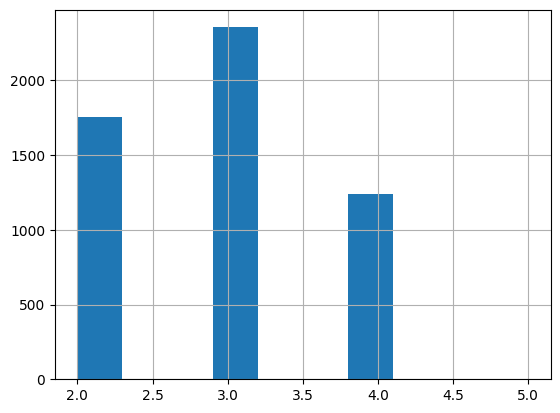

In [34]:
filtered_matches['ranks'].hist()

In [61]:
filtered_matches.sort_values('ranks', ascending=False)

,program_1,program_2,matches,ranks
2718,6416,8684,0,5
1648,6277,7267,9,4
4883,7618,8688,0,4
4239,7325,7603,0,4
4235,7325,7598,2,4
...,...,...,...,...
3139,6432,8766,0,2
3143,6432,9181,0,2
920,6203,6652,2,2
3145,6644,6648,1,2


In [42]:
filtered_matches = filtered_matches.sort_values('ranks', ascending=False)

In [72]:
id_ = ["7325", "7598"]
if isinstance(id_, list):
    l = df[df.index.isin(id_)]
else:
    l = df[df.index == id_]
l

,name,url,Направление (тег),Специализация,Подвид,Тип устройства,"Технологии, инструменты",Уровень сложности,Класс,techs
7325,Frontend-разработчик. Специалист\t,https://gb.ru/geek_university/developer/progra...,Информационные технологии,Frontend-разработчик отвечает за внешний вид с...,Frontend,,"JavaScript,Vue.js,TypeScript,Webpack,SQL,NoSQL...",Junior,Взрослый,"[JavaScript, Vue.js, TypeScript, Webpack, SQL,..."
7598,Data Science в медицине. Специалист,https://gb.ru/geek_university/developer/analys...,Информационные технологии,Data Science в медицине занимается анализом бо...,"Сбор и обработка данных,Анализ данных,Data Sci...","Оборудование,Умные устройства","Python,SQL,Docker,NoSQL,ANNs,Keras,TensorFlow,...",Junior,Взрослый,"[Python, SQL, Docker, NoSQL, ANNs, Keras, Tens..."


In [73]:
max_simular = 10
# Convert to dictionary
llm_result = {group: {
            'simular': data.sort_values('ranks', ascending=False).head(max_simular).apply(lambda row: row.to_dict(), axis=1).tolist()
         }
          for group, data in filtered_matches.groupby('program_1')}

for k, v in llm_result.items():
    for t in v['simular']:
        del t['program_1']
        t['program_id'] = t['program_2']
        
        del t['matches']
        del t['program_2']
        t['match_score'] = t['ranks'] / MAX_RATING
        del t['ranks']

# import json
# with open('tmp/llm_simular_matches.json', 'w') as f:
#     json.dump(llm_result, f)

In [68]:
dfs = []
for group, data in filtered_matches.groupby('program_1'):
    dfs += [data.sort_values('ranks', ascending=False).head(max_simular)]
pd.concat(dfs)

,program_1,program_2,matches,ranks
329,4020,6475,0,4
375,4020,7605,0,4
379,4020,7783,0,4
381,4020,7916,0,4
363,4020,7426,0,4
...,...,...,...,...
5350,8979,9037,0,2
5351,8979,9181,0,2
5353,9037,9181,0,3
5354,9037,9182,0,3


### debug

In [18]:
df[df.index == row['program_1']].to_dict(orient='index')

{'8767': {'name': 'Python-разработчик. Специалист. Смешанный формат',
  'url': 'https://gb.ru/geek_university/developer/programmer/python-gb',
  'Направление (тег)': 'Информационные технологии',
  'Специализация': 'Python является самым популярным языком программирования из-за своей простоты и универсальности. Его используют не только для разработки веб-приложений и сервисов, но и для автоматизации, тестирования, анализа данных и машинного обучения. На Python написано множество библиотек для нейросетей и много другого., Программирование',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': 'Python,SQL,NoSQL,Django,JavaScript,HTML/CSS,Git',
  'Уровень сложности': 'Junior',
  'Класс': 'Взрослый',
  'techs': ['Python',
   'SQL',
   'NoSQL',
   'Django',
   'JavaScript',
   'HTML/CSS',
   'Git']}}

In [86]:
df[df.index == id_]['url'][0]

'https://gb.ru/geek_university/developer'

In [280]:
df[df.index == id_]['Специализация'][0]

'Ландшафтный дизайн — это визуальный язык, позволяющий работать с природными средствами. Ландшафтный дизайнер сочетает три аспекта (архитектуру, ботанику и философию) в зависимости от того, как будет использоваться территория, которую он облагораживает., Дизайн среды'

In [213]:
df[df.index == '6239']['url'][0]

'https://gb.ru/geek_university/developer/programmer'

In [73]:
df[df.index == '6265']

,name,url,Направление (тег),Специализация,Подвид,Тип устройства,"Технологии, инструменты",Уровень сложности,Класс,techs
6265,Fullstack-разработчик,https://gb.ru/geek_university/developer/progra...,Информационные технологии,Fullstack-разработчики — универсальные програм...,Fullstack,,"JavaScript,HTML/CSS,PHP,Laravel,SQL,Git",Junior,Взрослый,"[JavaScript, HTML/CSS, PHP, Laravel, SQL, Git]"


In [185]:
df['Уровень сложности'].unique()

array(['Junior', 'Middle'], dtype=object)

In [186]:
df[df['Уровень сложности'] == 'Middle']

,name,Направление (тег),Специализация,Подвид,Тип устройства,"Технологии, инструменты",Уровень сложности,Класс
6304,Инженер по тестированию Мастер,Информационные технологии,QA-тестировщик или инженер по тестированию — э...,"Ручное,автоматизированное","Десктоп,Веб,Mobile,Оборудование,Умные устройства","Java,SQL,NoSQL,Allure,Spring,JUnit,Selenium,RE...",Middle,Взрослый
6261,Frontend-разработчик Мастер,Информационные технологии,Frontend-разработчик отвечает за внешний вид с...,Frontend,,"JavaScript,NodeJS,Vue.js,ReactJS,TypeScript,We...",Middle,Взрослый
6277,Программист Java Мастер,Информационные технологии,Java-разработчик занимается разработкой высоко...,Backend,,"Java,SQL,NoSQL,Spring,Ethernet,Linux,Git,LibGD...",Middle,Взрослый
6292,Инженер-программист Python Мастер,Информационные технологии,Python является самым популярным языком програ...,Backend,,"Python,SQL,NoSQL,Django,JavaScript,HTML/CSS,Git",Middle,Взрослый
6340,ИТ-инженер Data Science Мастер,Информационные технологии,Data Scientist анализирует большой объём данны...,,"Десктоп,Веб,Mobile,Оборудование","Python,SQL,Docker,NoSQL,ANNs,Keras,TensorFlow,...",Middle,Взрослый
6498,Графический дизайнер Мастер,Дизайн,"Графический дизайнер — это специалист, который...",,"Десктоп,Веб,Mobile,Оборудование,Умные устройства","Illustrator,Photoshop,InDesign",Middle,Взрослый
6506,Цифровой дизайнер Мастер,Дизайн,"Цифровой дизайнер, он же веб-дизайнер, придумы...",,,"Figma,Tilda,HTML,CSS,Adobe Photoshop",Middle,Взрослый
6644,Дата-сайентист в медицине Мастер,Информационные технологии,Data Scientist анализирует большой объём данны...,"Сбор и обработка данных,Анализ данных,Data Sci...","Оборудование,Умные устройства","Python,SQL,Docker,NoSQL,ANNs,Keras,TensorFlow,...",Middle,Взрослый
6652,DevOps-инженер Мастер,Информационные технологии,DevOps-инженеры контролируют все этапы создани...,Backend,Оборудование,"Ethernet,Unix,CI/CD,DNS,Docker,Kubernetes (K8s...",Middle,Взрослый
6540,UX/UI дизайнер Мастер,Дизайн,UX/UI-дизайнер проектирует взаимодействие поль...,,"Десктоп,Веб,Mobile,Оборудование,Умные устройства","UX/UI,Figma,Tilda,HTML,СSS,Adobe Photoshop",Middle,Взрослый
